<a href="https://colab.research.google.com/github/BeomJinPNU/202006136/blob/main/250516.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
%config lnlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('/content/drive/MyDrive/example_data.csv')
df

,학번,이름,학년,점수,분반,공부시간
0,1,신사임당,NaN,69,B,4
1,2,홍길동,1.0,92,B,3
2,3,강감찬,4.0,91,C,20
3,4,강감찬,2.0,70,C,5
4,5,강감찬,3.0,83,C,5
5,6,이순신,4.0,95,A,0
6,7,강감찬,4.0,71,C,1
7,8,김유신,NaN,88,B,5
8,9,신사임당,3.0,94,A,9
9,10,홍길동,NaN,60,B,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      21 non-null     int64  
 1   이름      18 non-null     object 
 2   학년      18 non-null     float64
 3   점수      21 non-null     int64  
 4   분반      21 non-null     object 
 5   공부시간    21 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ KB


In [5]:
df.describe()

,학번,학년,점수,공부시간
count,21.000000,18.000000,21.000000,21.000000
mean,10.952381,2.777778,90.523810,4.333333
std,6.127611,1.165966,38.647922,5.650959
min,1.000000,1.000000,60.000000,0.000000
25%,6.000000,2.000000,69.000000,1.000000
50%,11.000000,3.000000,83.000000,3.000000
75%,16.000000,4.000000,94.000000,5.000000
max,20.000000,4.000000,200.000000,20.000000


In [6]:
print(pd.isna(df).sum())

학번      0
이름      3
학년      3
점수      0
분반      0
공부시간    0
dtype: int64


In [13]:
이상치_데이터 = df[(df['점수'] > 100) | (df['공부시간'] > 10)]

이상치_개수 = len(이상치_데이터)
print(f"\n이상치 데이터 개수: {이상치_개수}")
print(이상치_데이터)


이상치 데이터 개수: 4
    학번    이름   학년   점수 분반  공부시간
2    3   강감찬  4.0   91  C    20
10  11   NaN  1.0  200  C     0
11  12  신사임당  2.0   96  A    20
18  19   이순신  1.0  200  A     3


In [8]:
print(f"중복 제거 전 데이터프레임 크기: {df.shape}")

# 모든 열을 기준으로 중복된 행 찾기
중복된_행_마스크 = df.duplicated()

# 중복된 행을 출력합니다.
중복된_데이터 = df[중복된_행_마스크]
print("중복된 데이터:")
print(중복된_데이터)

# 중복된 행의 개수를 확인합니다.
중복된_행_개수 = 중복된_행_마스크.sum()
print(f"\n중복된 행 개수: {중복된_행_개수}")

중복 제거 전 데이터프레임 크기: (21, 6)
중복된 데이터:
    학번    이름   학년  점수 분반  공부시간
20  20  신사임당  2.0  61  A     2

중복된 행 개수: 1


In [28]:
# 중복 제거 전 데이터프레임 크기 확인
print(f"중복 제거 전 데이터프레임 크기: {df.shape}")

# 모든 열을 기준으로 중복된 행을 제거하고 첫 번째 행을 유지
# inplace=True를 사용하면 원본 df가 수정됩니다.
df_cleaned = df.drop_duplicates(keep='first')

# 또는 원본 df를 직접 수정하려면:
df.drop_duplicates(keep='first', inplace=True)

# 중복 제거 후 데이터프레임 크기 확인
print(f"중복 제거 후 데이터프레임 크기: {df_cleaned.shape}")

# 제거된 데이터프레임 확인 (선택 사항)
print(df)

중복 제거 전 데이터프레임 크기: (21, 6)
중복 제거 후 데이터프레임 크기: (20, 6)
    학번    이름   학년   점수 분반  공부시간
0    1  신사임당  NaN   69  B     4
1    2   홍길동  1.0   92  B     3
2    3   강감찬  4.0   91  C    20
3    4   강감찬  2.0   70  C     5
4    5   강감찬  3.0   83  C     5
5    6   이순신  4.0   95  A     0
6    7   강감찬  4.0   71  C     1
7    8   김유신  NaN   88  B     5
8    9  신사임당  3.0   94  A     9
9   10   홍길동  NaN   60  B     3
10  11   NaN  1.0  200  C     0
11  12  신사임당  2.0   96  A    20
12  13   김유신  4.0   65  A     0
13  14   NaN  2.0   98  C     1
14  15   홍길동  4.0   77  A     2
15  16   이순신  4.0   75  A     4
16  17   NaN  3.0   64  A     2
17  18   홍길동  4.0   91  A     0
18  19   이순신  1.0  200  A     3
19  20  신사임당  2.0   61  A     2


<function matplotlib.pyplot.show(close=None, block=None)>

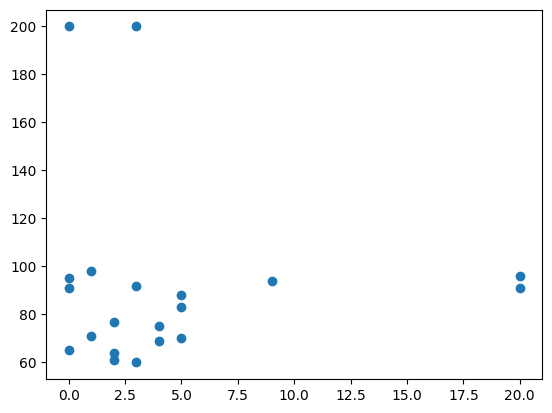

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df['공부시간'], df['점수'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

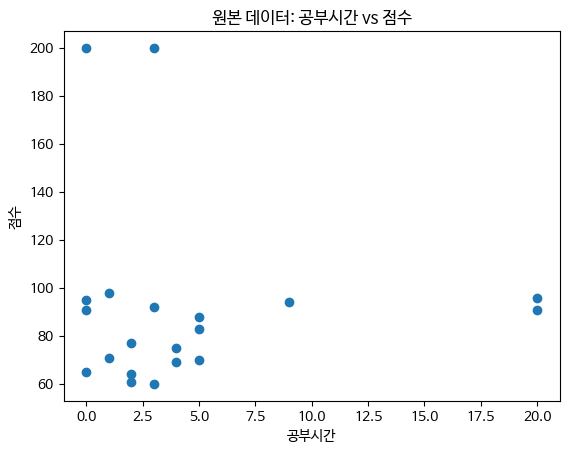

In [31]:
plt.rc('font', family='NanumBarunGothic')
plt.scatter(df['공부시간'], df['점수'])
plt.title('원본 데이터: 공부시간 vs 점수')
plt.xlabel('공부시간')
plt.ylabel('점수')
plt.show

In [30]:
# 점수와 공부시간의 이상치 처리
score_outlier = df['점수'] > 150
score_outlier_list = df[score_outlier]
print("점수 이상치:")
print(score_outlier_list)

study_outlier = df['공부시간'] > 15
study_outlier_list = df[study_outlier]
print("공부시간 이상치:")
print(study_outlier_list)

# df.drop((df['점수'] > 150) | (df['공부시간'] > 15), inplace=True)
# df.drop(index=df[(df['점수'] > 150) | (df['공부시간'] > 15)].index, inplace=True)

print("이상치가 제거된 데이터프레임:")
print(df)

점수 이상치:
    학번   이름   학년   점수 분반  공부시간
10  11  NaN  1.0  200  C     0
18  19  이순신  1.0  200  A     3
공부시간 이상치:
    학번    이름   학년  점수 분반  공부시간
2    3   강감찬  4.0  91  C    20
11  12  신사임당  2.0  96  A    20
이상치가 제거된 데이터프레임:
    학번    이름   학년   점수 분반  공부시간
0    1  신사임당  NaN   69  B     4
1    2   홍길동  1.0   92  B     3
2    3   강감찬  4.0   91  C    20
3    4   강감찬  2.0   70  C     5
4    5   강감찬  3.0   83  C     5
5    6   이순신  4.0   95  A     0
6    7   강감찬  4.0   71  C     1
7    8   김유신  NaN   88  B     5
8    9  신사임당  3.0   94  A     9
9   10   홍길동  NaN   60  B     3
10  11   NaN  1.0  200  C     0
11  12  신사임당  2.0   96  A    20
12  13   김유신  4.0   65  A     0
13  14   NaN  2.0   98  C     1
14  15   홍길동  4.0   77  A     2
15  16   이순신  4.0   75  A     4
16  17   NaN  3.0   64  A     2
17  18   홍길동  4.0   91  A     0
18  19   이순신  1.0  200  A     3
19  20  신사임당  2.0   61  A     2


In [32]:
Q1_score = df['점수'].quantile(0.25)
Q3_score = df['점수'].quantile(0.75)
print(Q1_score)
print(Q3_score)
IQR_score = Q3_score - Q1_score

69.75
94.25


In [33]:
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

In [35]:
Q1_study = df['공부시간'].quantile(0.25)
Q3_study = df['공부시간'].quantile(0.75)
print(Q1_study)
print(Q3_study)
IQR_study = Q3_study - Q1_study

1.0
5.0


In [36]:
lower_bound_study = Q1_study - 1.5 * IQR_study
upper_bound_study = Q3_study + 1.5 * IQR_study

In [38]:
study_outliers = df[(df['점수'] < lower_bound_score) | (df['점수'] > upper_bound_score)]
print('점수 이상치:')
print(score_outliers)

점수 이상치:
    학번   이름   학년   점수 분반  공부시간
10  11  NaN  1.0  200  C     0
18  19  이순신  1.0  200  A     3


In [40]:
study_outliers = df[(df['공부시간'] < lower_bound_study) | (df['공부시간'] > upper_bound_study)]
print('공부시간 이상치:')
print(study_outliers)

공부시간 이상치:
    학번    이름   학년  점수 분반  공부시간
2    3   강감찬  4.0  91  C    20
11  12  신사임당  2.0  96  A    20


In [42]:
df_no_outliers = df[
    (df['점수'] >= lower_bound_score) & (df['점수'] <= upper_bound_score) &
    (df['공부시간'] >= lower_bound_study) & (df['공부시간'] <= upper_bound_study)
]

In [43]:
df_no_outliers = df_no_outliers.reset_index()
print('이상치가 제거된 데이터프레임:')
print(df_no_outliers)

이상치가 제거된 데이터프레임:
    index  학번    이름   학년  점수 분반  공부시간
0       0   1  신사임당  NaN  69  B     4
1       1   2   홍길동  1.0  92  B     3
2       3   4   강감찬  2.0  70  C     5
3       4   5   강감찬  3.0  83  C     5
4       5   6   이순신  4.0  95  A     0
5       6   7   강감찬  4.0  71  C     1
6       7   8   김유신  NaN  88  B     5
7       8   9  신사임당  3.0  94  A     9
8       9  10   홍길동  NaN  60  B     3
9      12  13   김유신  4.0  65  A     0
10     13  14   NaN  2.0  98  C     1
11     14  15   홍길동  4.0  77  A     2
12     15  16   이순신  4.0  75  A     4
13     16  17   NaN  3.0  64  A     2
14     17  18   홍길동  4.0  91  A     0
15     19  20  신사임당  2.0  61  A     2


In [44]:
# 10. 분반별 점수 평균 계산 (기본 방법)
print("문제11. 분반별 점수 평균")
class_mean = df_no_outliers.groupby('분반')['점수'].mean()
print(class_mean.round(2))

문제11. 분반별 점수 평균
분반
A    77.75
B    77.25
C    80.50
Name: 점수, dtype: float64


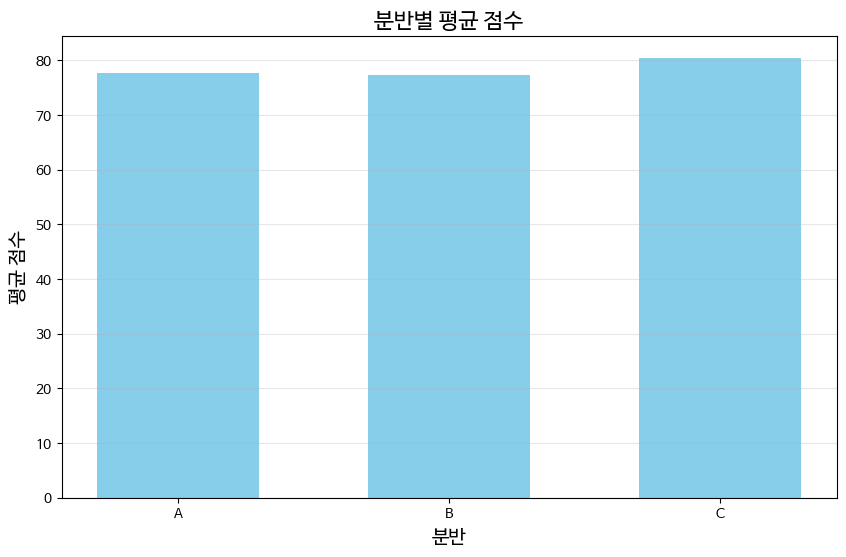

In [49]:
plt.figure(figsize=(10, 6))
plt.rc('font', family='NanumBarunGothic')
plt.bar(class_mean.index, class_mean.values, color='skyblue', width=0.6)
plt.title('분반별 평균 점수', fontsize=16)
plt.xlabel('분반', fontsize=14)
plt.ylabel('평균 점수', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.show()